In [7]:
import numpy as np
import pandas as pd
import seaborn as sb
import tensorflow as tf

sb.set_context('notebook', font_scale=2.0)
sb.set_style('darkgrid')

from matplotlib import pyplot as plt
from natsort import natsorted

%matplotlib inline

from sklearn.model_selection import train_test_split

## Datu ielāde

In [8]:
data = pd.read_csv('data/winequality-red.csv', sep=';')

### Datu analīze

In [9]:
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [11]:
data.describe().T

count       mean        std      min      25%  \
fixed acidity         1599.0   8.319637   1.741096  4.60000   7.1000   
volatile acidity      1599.0   0.527821   0.179060  0.12000   0.3900   
citric acid           1599.0   0.270976   0.194801  0.00000   0.0900   
residual sugar        1599.0   2.538806   1.409928  0.90000   1.9000   
chlorides             1599.0   0.087467   0.047065  0.01200   0.0700   
free sulfur dioxide   1599.0  15.874922  10.460157  1.00000   7.0000   
total sulfur dioxide  1599.0  46.467792  32.895324  6.00000  22.0000   
density               1599.0   0.996747   0.001887  0.99007   0.9956   
pH                    1599.0   3.311113   0.154386  2.74000   3.2100   
sulphates             1599.0   0.658149   0.169507  0.33000   0.5500   
alcohol               1599.0  10.422983   1.065668  8.40000   9.5000   
quality               1599.0   5.636023   0.807569  3.00000   5.0000   

                           50%        75%        max  
fixed acidity          7.90000   9.200000   15.90000  
volatile acidity       0.52000   0.640000    1.58000  
citric acid            0.26000   0.420000    1.00000  
residual sugar         2.20000   2.600000   15.50000  
chlorides              0.07900   0.090000    0.61100  
free sulfur dioxide   14.00000  21.000000   72.00000  
total sulfur dioxide  38.00000  62.000000  289.00000  
density                0.99675   0.997835    1.00369  
pH                     3.31000   3.400000    4.01000  
sulphates              0.62000   0.730000    2.00000  
alcohol               10.20000  11.100000   14.90000  
quality                6.00000   6.000000    8.00000

## Datu vizualizācija

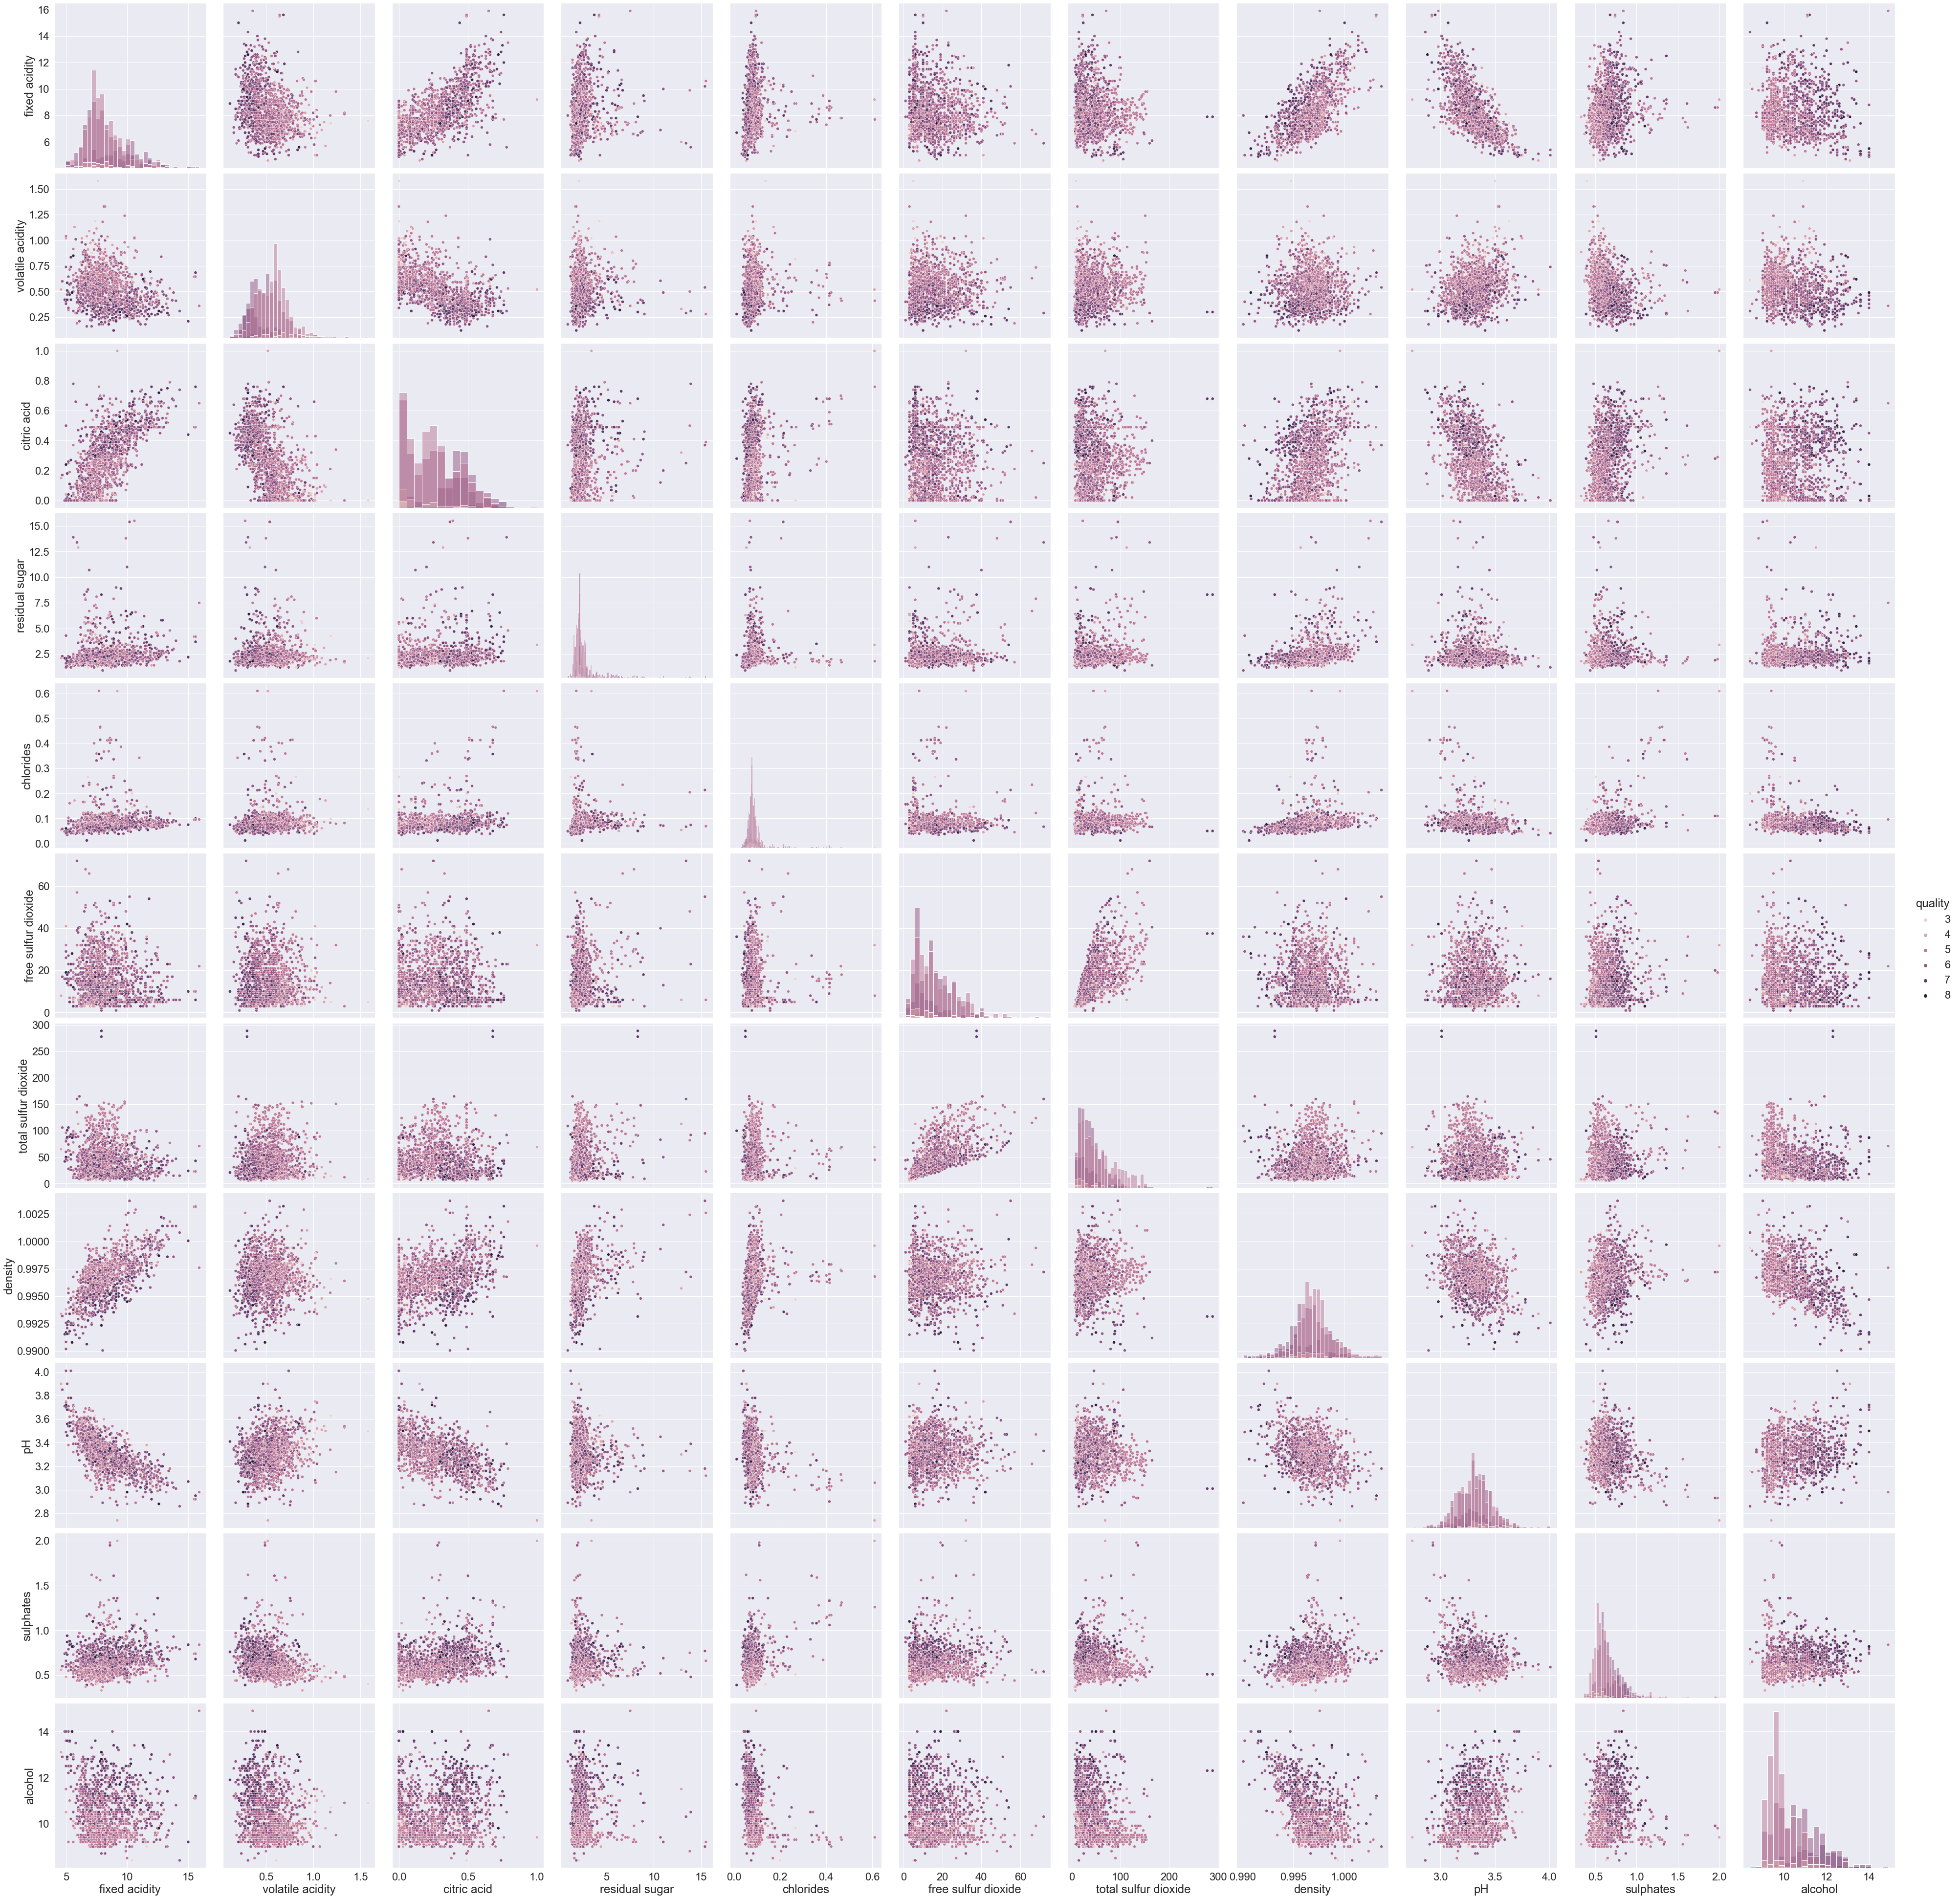

In [12]:
column_list = list(data.columns)#[0:-1]

sb.pairplot(data.loc[:,column_list], hue='quality', diag_kind='hist', height=5)

In [13]:
data = np.array(data)
attr_count = len(data[0])-1
class_count = 11

samples = []
classifications = []

for sample in data:
    classification = np.zeros(class_count)
    classification[int(sample[-1])] = 1
    classifications.append(classification)

    samples.append(sample[:-1])

classifications = np.array(classifications)
samples = np.array(samples)

samples_train, samples_test, classifications_train, classifications_test = train_test_split(samples, classifications, test_size=0.3, random_state=0)

In [14]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(attr_count, kernel_regularizer=tf.keras.regularizers.l2(0.05), activation='sigmoid', input_shape=(attr_count, )))
model.add(tf.keras.layers.Dense(100, kernel_regularizer=tf.keras.regularizers.l2(0.05), activation='sigmoid',))
model.add(tf.keras.layers.Dense(100, kernel_regularizer=tf.keras.regularizers.l2(0.05), activation='sigmoid',))
model.add(tf.keras.layers.Dense(class_count, activation='softmax'))
model.compile(optimizer='adam', loss='binary_crossentropy')

In [15]:
model.fit(samples_train, classifications_train, epochs=2000, verbose=0)

In [16]:
predictions = model.predict(samples_test)
# predictions = model.predict(samples_train)

In [17]:
sample_idx = -15
row = predictions[sample_idx]
print(f'Predictions: {row}')
print(f'Classified as: {np.argmax(row)}')
print(f'Expectated: {np.argmax(classifications_test)}')
# print(f'Expectated classification: {np.argmax(classifications_train)}')

Predictions: [3.4970089e-09 3.3724701e-09 3.5018479e-09 4.0906020e-03 2.1197492e-02
 4.6152076e-01 4.0601566e-01 9.9507056e-02 7.6683727e-03 3.4973890e-09
 3.4696161e-09]
Classified as: 5
Expectated: 6
